<a href="https://colab.research.google.com/github/RodrigoDSVDF/Projeto1/blob/main/1_regressao_linear_simples_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Regressão linear simples

In [ ]:
# Importação das bibliotecas, sklearn para criar o modelo de regressão e yellowbrick para visualização de residuais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Warning
from yellowbrick.regressor import ResidualsPlot

In [ ]:
# Carregamento da base de dados e exclusão da primeira coluna
base = pd.read_csv('/content/credit_card_fraud.csv.zip')


In [ ]:
base.head()

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,2022-09-24 13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,04/29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,03/26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,11/29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,2021-01-07 21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,09/25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,2021-12-16 06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,03/31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...


In [ ]:
base.columns = [
    'data_hora_transacao',
    'valor_transacao',
    'nome_titular_do_cartao',
    'numero_cartao_hashed_ou_encriptado',
    'nome_comerciante',
    'codigo_categoria_comerciante_mcc',
    'localizacao_transacao_cidade_ou_cep',
    'moeda_transacao',
    'tipo_cartao',
    'data_expiracao_cartao',
    'codigo_cvv_hashed_ou_encriptado',
    'codigo_resposta_transacao',
    'identificador_transacao',
    'flag_ou_rotulo_fraude',
    'transacoes_anteriores',
    'fonte_transacao',
    'endereco_ip',
    'informacoes_dispositivo',
    'informacoes_conta_usuario',
    'notas_transacao'
]


In [ ]:
base.head()

,data_hora_transacao,valor_transacao,nome_titular_do_cartao,numero_cartao_hashed_ou_encriptado,nome_comerciante,codigo_categoria_comerciante_mcc,localizacao_transacao_cidade_ou_cep,moeda_transacao,tipo_cartao,data_expiracao_cartao,codigo_cvv_hashed_ou_encriptado,codigo_resposta_transacao,identificador_transacao,flag_ou_rotulo_fraude,transacoes_anteriores,fonte_transacao,endereco_ip,informacoes_dispositivo,informacoes_conta_usuario,notas_transacao
0,2022-09-24 13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,04/29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,03/26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,11/29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,2021-01-07 21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,09/25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,2021-12-16 06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,03/31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...


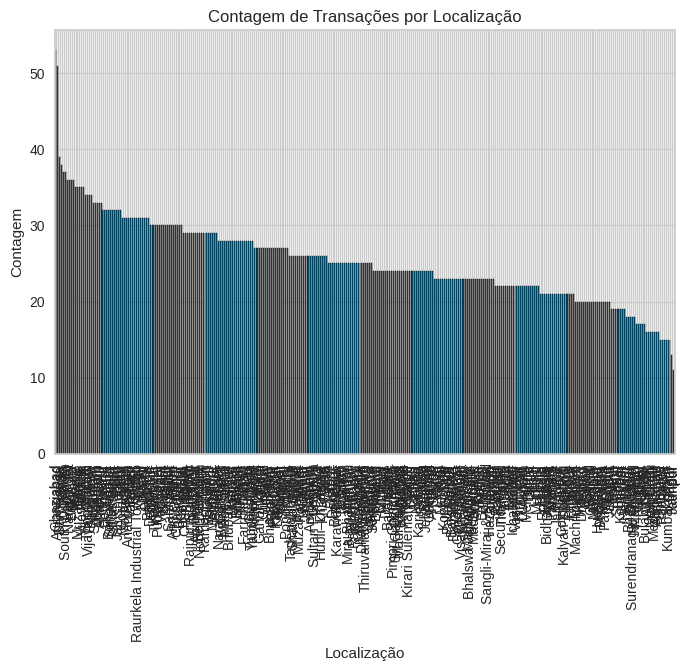

In [ ]:
import matplotlib.pyplot as plt

# Supondo que 'base' seja seu DataFrame
base['localizacao_transacao_cidade_ou_cep'].value_counts().plot(kind='bar', edgecolor='black')

# Adicione rótulos e um título
plt.xlabel('Localização')
plt.ylabel('Contagem')
plt.title('Contagem de Transações por Localização')

plt.show()


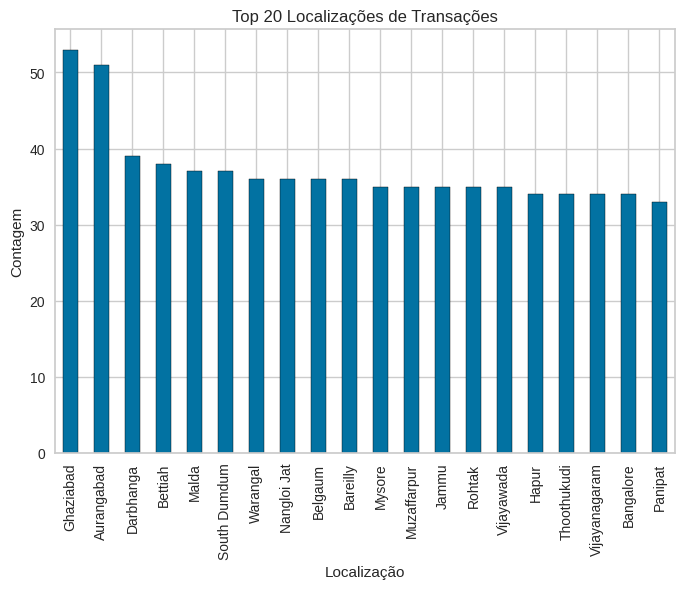

In [ ]:
top_n = 20  # Defina o número desejado de principais categorias
top_localizacoes = base['localizacao_transacao_cidade_ou_cep'].value_counts().nlargest(top_n)

# Plot do gráfico de barras com as top N localizações
top_localizacoes.plot(kind='bar', edgecolor='black')
plt.xlabel('Localização')
plt.ylabel('Contagem')
plt.title(f'Top {top_n} Localizações de Transações')
plt.show()


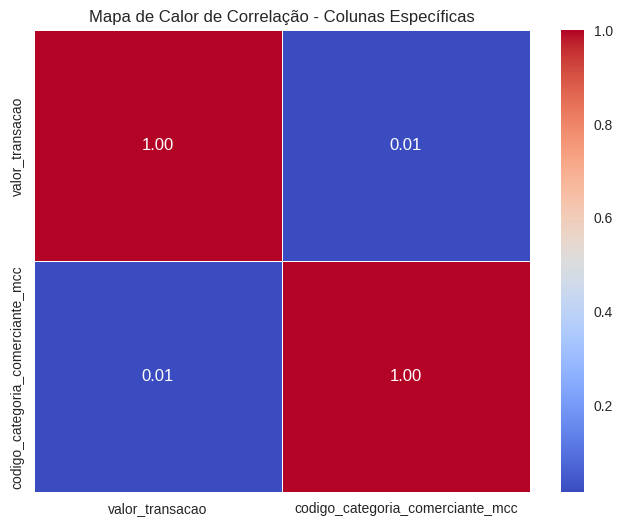

In [309]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'base' seja seu DataFrame e 'colunas_interessantes' seja uma lista das colunas desejadas
colunas_interessantes = ['valor_transacao', 'codigo_categoria_comerciante_mcc',]

# Selecione apenas as colunas de interesse
subset_base = base[colunas_interessantes]

# Calcule a matriz de correlação
correlacao = subset_base.corr()

# Crie um mapa de calor (heatmap) usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Adicione um título
plt.title('Mapa de Calor de Correlação - Colunas Específicas')

# Exiba o gráfico
plt.show()


In [311]:
import plotly.express as px

# Supondo que 'base' seja seu DataFrame e 'colunas_interessantes' seja uma lista das colunas desejadas
colunas_interessantes = [
    'data_hora_transacao',
    'valor_transacao',
    'nome_titular_do_cartao',
    'numero_cartao_hashed_ou_encriptado',
    'nome_comerciante',
    'codigo_categoria_comerciante_mcc',
    'localizacao_transacao_cidade_ou_cep',
    'moeda_transacao',
    'tipo_cartao',
    'data_expiracao_cartao',
    'codigo_cvv_hashed_ou_encriptado',
    'identificador_transacao',
    'flag_ou_rotulo_fraude',
    'transacoes_anteriores',
    'fonte_transacao',
    'endereco_ip',
]

# Selecione apenas as colunas de interesse
subset_base = base[colunas_interessantes]

# Calcule a matriz de correlação
correlacao = subset_base.corr()

# Crie um gráfico de correlação interativo com plotly
fig = px.imshow(correlacao, x=correlacao.columns, y=correlacao.columns, color_continuous_scale='Viridis')

# Atualize o layout para torná-lo mais informativo
fig.update_layout(title='Mapa de Calor de Correlação - Colunas Específicas')

# Exiba o gráfico
fig.show()



<ipython-input-311-fcb740eec899>:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = subset_base.corr()


<ipython-input-312-44e45d99cc50>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



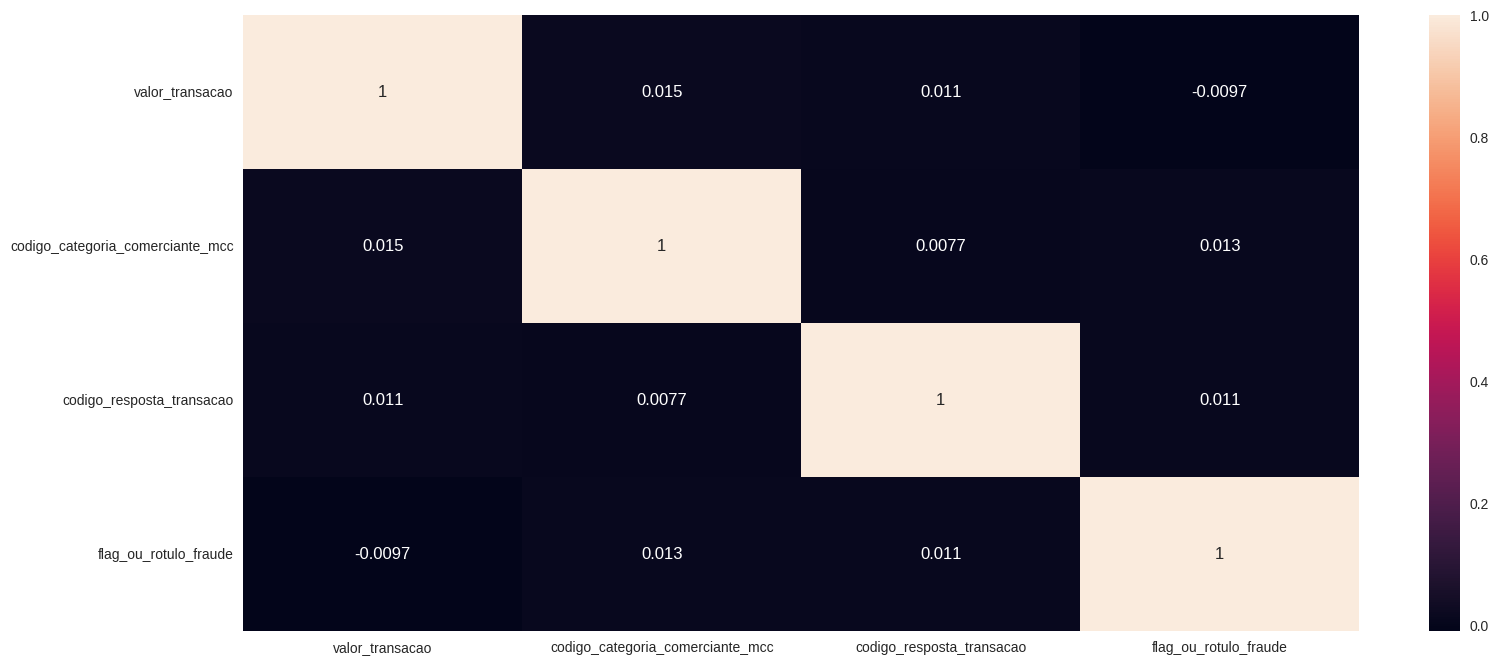

In [312]:
plt.rcParams["figure.figsize"] = (18,8)
ax = sns.heatmap(base.corr(), annot=True)

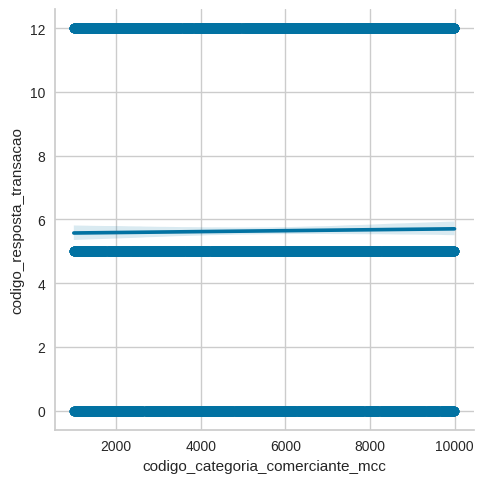

In [326]:
sns.lmplot(x = "codigo_categoria_comerciante_mcc", y = "codigo_resposta_transacao", data = base);





<ipython-input-324-0bc557372871>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



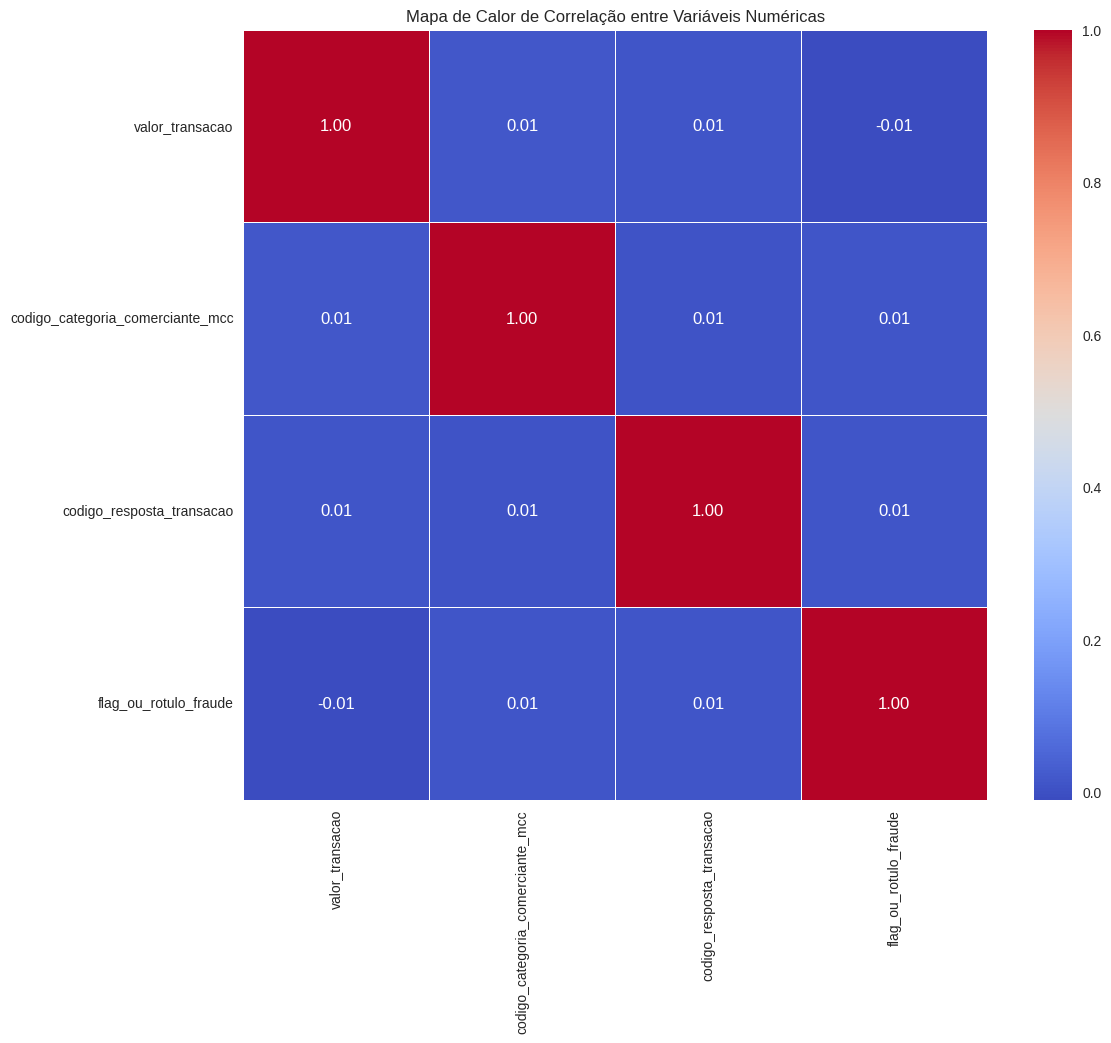

In [324]:
# Calcule a matriz de correlação
correlacao = base.corr()

# Crie um mapa de calor (heatmap) usando seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlação entre Variáveis Numéricas')
plt.show()


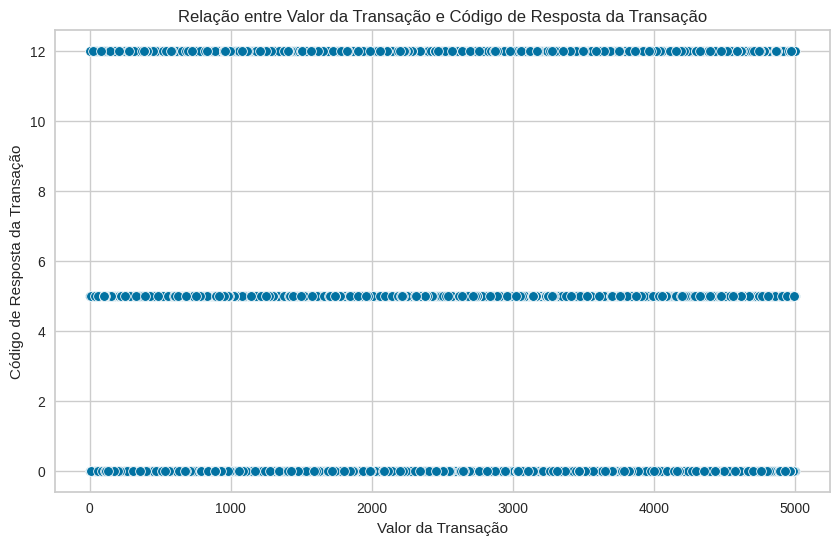

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersão simples
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valor_transacao', y='codigo_resposta_transacao', data=base)
plt.xlabel('Valor da Transação')
plt.ylabel('Código de Resposta da Transação')
plt.title('Relação entre Valor da Transação e Código de Resposta da Transação')
plt.show()


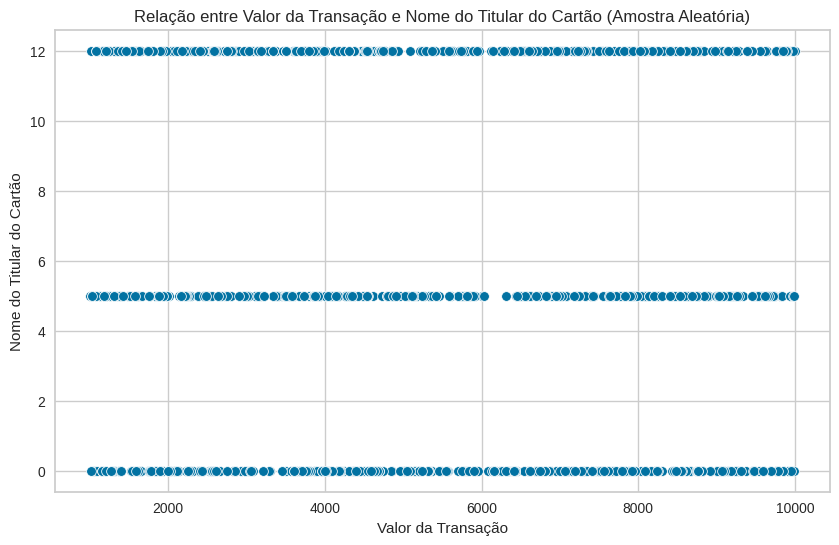

In [327]:
# Amostragem aleatória de 1000 pontos
amostra = base.sample(n=1000, random_state=42)

# Gráfico de dispersão com a amostra
plt.figure(figsize=(10, 6))
sns.scatterplot(x='codigo_categoria_comerciante_mcc', y='codigo_resposta_transacao', data=amostra)
plt.xlabel('Valor da Transação')
plt.ylabel('Nome do Titular do Cartão')
plt.title('Relação entre Valor da Transação e Nome do Titular do Cartão (Amostra Aleatória)')
plt.show()


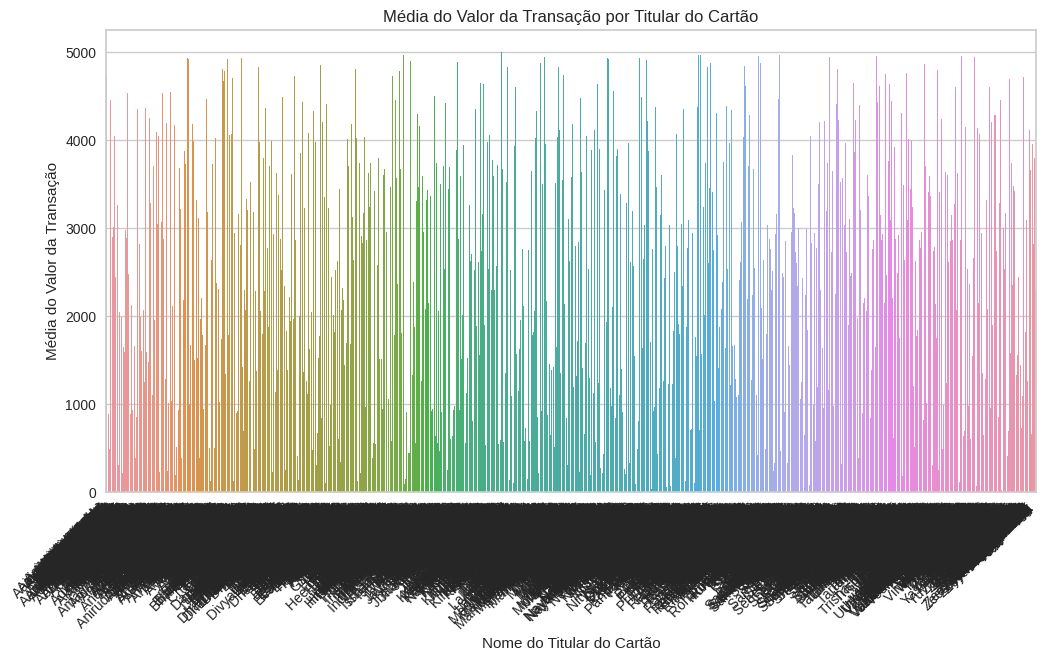

In [318]:
# Agrupe por titular do cartão e calcule a média do valor da transação
agrupado = base.groupby('nome_titular_do_cartao')['valor_transacao'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='nome_titular_do_cartao', y='valor_transacao', data=agrupado)
plt.xlabel('Nome do Titular do Cartão')
plt.ylabel('Média do Valor da Transação')
plt.title('Média do Valor da Transação por Titular do Cartão')
plt.xticks(rotation=45, ha='right')
plt.show()


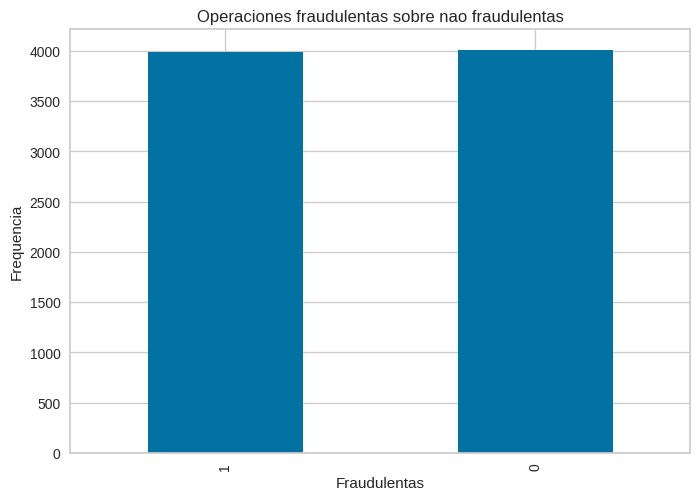

In [ ]:
# Contamos quantas operaçoes são verdadeiras (0) e quantas são falsas (1)
count_classes= pd.value_counts(base['flag_ou_rotulo_fraude'], sort = False)

# Método válido para clasificar as categorias
# count_classes es una serie
count_classes.plot(kind='bar')
plt.title("Operaciones fraudulentas sobre nao fraudulentas")
plt.xlabel("Fraudulentas")
plt.ylabel("Frequencia")
plt.show()


<ipython-input-329-30a4fe078e88>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'data_hora_transacao')

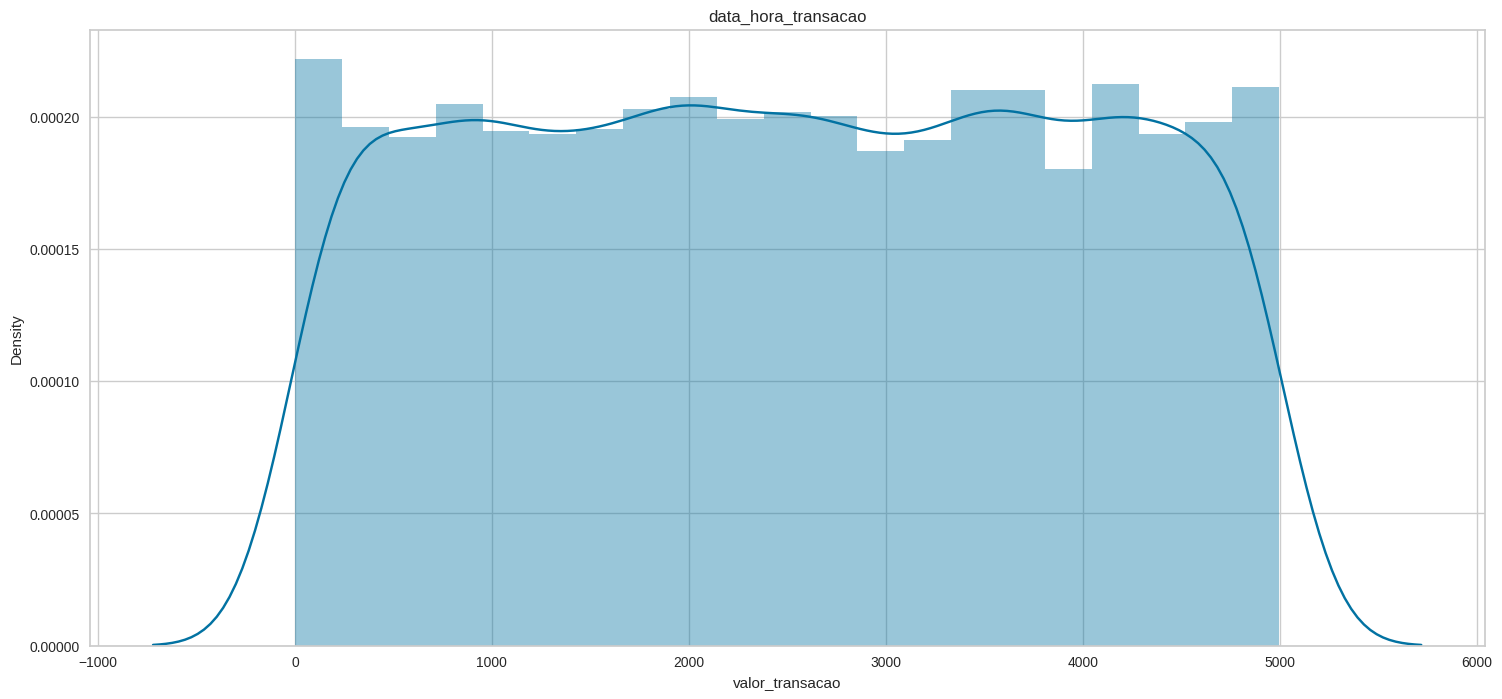

In [329]:
sns.distplot(base['valor_transacao']).set_title('data_hora_transacao')

In [ ]:
print(base.columns)







Index(['data_hora_transacao', 'valor_transacao', 'nome_titular_do_cartao',
       'numero_cartao_hashed_ou_encriptado', 'nome_comerciante',
       'codigo_categoria_comerciante_mcc',
       'localizacao_transacao_cidade_ou_cep', 'moeda_transacao', 'tipo_cartao',
       'data_expiracao_cartao', 'codigo_cvv_hashed_ou_encriptado',
       'codigo_resposta_transacao', 'identificador_transacao',
       'flag_ou_rotulo_fraude', 'transacoes_anteriores', 'fonte_transacao',
       'endereco_ip', 'informacoes_dispositivo', 'informacoes_conta_usuario',
       'notas_transacao'],
      dtype='object')


In [ ]:
colunas_desnecessarias = [
    'nome_titular_do_cartao',
    'numero_cartao_hashed_ou_encriptado',
    'codigo_cvv_hashed_ou_encriptado',
    'informacoes_conta_usuario',
    'tipo_cartao',
    'data_expiracao_cartao',
    'notas_transacao',
    'nome_comerciante',
    'localizacao_transacao_cidade_ou_cep',
    'moeda_transacao',
    'identificador_transacao',
    'data_hora_transacao',
    'transacoes_anteriores',
    'fonte_transacao',
    'informacoes_dispositivo',
    'endereco_ip'
]

base = base.drop(colunas_desnecessarias, axis=1)





In [ ]:
base.head()

,valor_transacao,codigo_categoria_comerciante_mcc,codigo_resposta_transacao,flag_ou_rotulo_fraude
0,285.88,3590,5,1
1,1777.32,7277,12,1
2,3939.01,9297,5,1
3,376.44,5686,5,0
4,1687.33,2940,5,1


<Axes: ylabel='Frequency'>

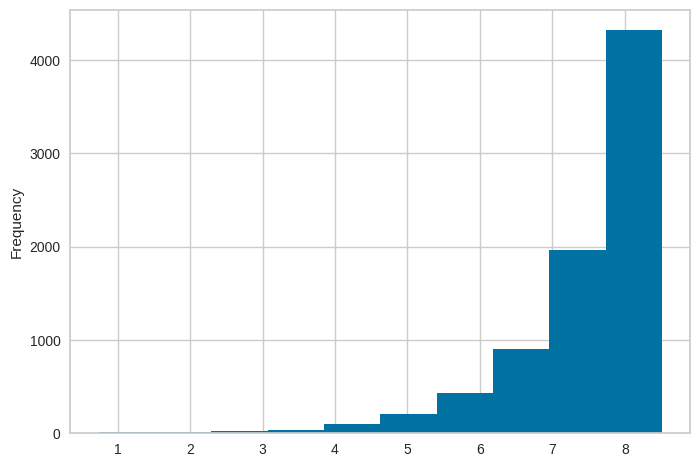

In [ ]:
# Pueden aplicarse formulas sobre las columnas de un Data Frame
base['logvalor_transacao'] = np.log(base['valor_transacao']+1)
# Para después dibujar un histograma
base['logvalor_transacao'].sort_values().plot.hist()

In [330]:
# Escalamos la variable amount

from sklearn.preprocessing import StandardScaler
base['normvalor_transacao'] = StandardScaler().fit_transform(base['valor_transacao'].values.reshape (-1,1))
base = base.drop (['codigo_resposta_transacao', 'valor_transacao','logvalor_transacao'], axis = 1);

KeyError: ignored

In [ ]:
X = base.iloc[:, base.columns != 'flag_ou_rotulo_fraude']
y = base.iloc[:, base.columns == 'flag_ou_rotulo_fraude']
len(y[y.flag_ou_rotulo_fraude ==1]);

In [ ]:

# Contamos el número de casos de fraude que existen ¡¡
number_records_fraud = len (base[base.flag_ou_rotulo_fraude==1])
# Y extraemmos los índices donde están los casos de fraude y los de no fraude
fraud_indices = np.array (base[base.flag_ou_rotulo_fraude==1].index)
normal_indices = np.array (base[base.flag_ou_rotulo_fraude==0].index)




In [ ]:
# Obtenemos de forma aleatoria un número de indices de no fraude, igual al de fraude
random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )
# Unimos en un solo array los indices de fraude con los de no fraude escogidos aleatoriamente
under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])

In [ ]:
# Ahora escogemos los valores de dichos indices
under_sample_data = base.iloc[under_sample_indices,:]
# Separamos la X de la y de nuevo
X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'flag_ou_rotulo_fraude'];
y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'flag_ou_rotulo_froude'];

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 42)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.2, random_state = 42)

In [ ]:
import numpy as np

X_train_under = np.array(X_train_under)
y_train_under = np.array(y_train_under)


In [ ]:
under_sample_indices = base[base['flag_ou_rotulo_fraude'] == 0].index



In [ ]:
under_sample_data = base.iloc[under_sample_indices, :]


In [ ]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'flag_ou_rotulo_fraude']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'flag_ou_rotulo_fraude']


In [ ]:
print(base.isnull().sum())

codigo_categoria_comerciante_mcc    0
flag_ou_rotulo_fraude               0
normvalor_transacao                 0
dtype: int64


In [ ]:


# Converter colunas categóricas usando codificação one-hot
base_encoded = pd.get_dummies(base, columns=['flag_ou_rotulo_fraude', 'normvalor_transacao'])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)


In [ ]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

In [ ]:
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train_under, y_train_under)
y_pred = MLPC.predict(X_test)
# Obtenemos valores de recall
recall_acc = recall_score (y_test,y_pred)
recall_acc

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0

In [ ]:
base = pd.get_dummies(base, columns=['nome_titular_do_cartao', 'nome_comerciante', 'codigo_categoria_comerciante_mcc', 'moeda_transacao', 'tipo_cartao', 'codigo_resposta_transacao', 'fonte_transacao', 'endereco_ip', 'informacoes_dispositivo', 'informacoes_conta_usuario', 'notas_transacao'])


In [ ]:
base.head()

,codigo_categoria_comerciante_mcc,flag_ou_rotulo_fraude,normvalor_transacao
0,3590,1,-1.523278
1,7277,1,-0.495501
2,9297,1,0.994159
3,5686,0,-1.460872
4,2940,1,-0.557514


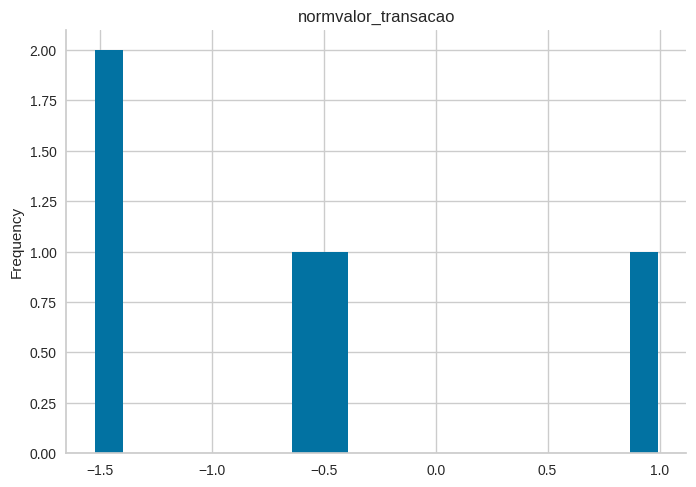

In [ ]:
from matplotlib import pyplot as plt
_df_3['normvalor_transacao'].plot(kind='hist', bins=20, title='normvalor_transacao')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
base = base.select_dtypes(include=['float64', 'int64'])


In [ ]:
print(base.head())

   codigo_categoria_comerciante_mcc  flag_ou_rotulo_fraude  \
0                              3590                      1   
1                              7277                      1   
2                              9297                      1   
3                              5686                      0   
4                              2940                      1   

   normvalor_transacao  
0            -1.523278  
1            -0.495501  
2             0.994159  
3            -1.460872  
4            -0.557514  


In [ ]:
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train_under, y_train_under)
y_pred = MLPC.predict(X_test)
# Obtenemos valores de recall
recall_acc = recall_score (y_test,y_pred)
recall_acc


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0

In [ ]:
# Definição das variáveis X e Y, X distância é a variável independente e Y velocidade é a variável dependente
X = base.iloc[:, 1].values
y = base.iloc[:, 0].values
X

In [ ]:
# Cálculo da correlação entre X e Y
correlacao = np.corrcoef(X, y)
correlacao

In [ ]:
#formato de matriz com uma coluna a mais
X = X.reshape(-1, 1)
# Criação do modelo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(X, y)

In [ ]:
# Visualização dos coeficientes
modelo.intercept_

In [ ]:
#inclinacao
modelo.coef_

In [ ]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

In [ ]:
# Previsão da "distância 22 pés" usando a fórmula manual
# interceptação * inclinação * valor de dist
#Qual velocidade se levou 22 pés pra parar?
modelo.intercept_ + modelo.coef_ * 22

In [ ]:
# Previsão utilizando função do sklearn
modelo.predict([[22]])

In [ ]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()